<a href="https://colab.research.google.com/github/HariPN13/SignalProcessingTutorial/blob/master/Wormos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import matplotlib.pyplot as plt
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import  numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

import tensorflow as tf
from keras.models import Sequential  
from keras.layers import *  
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from keras.utils import to_categorical

Preprocessing data for classification: Pandas and Numpy

In [2]:
Location = 'https://raw.githubusercontent.com/HariPN13/WormCalcium/master/DataCSV1.csv?token=ALIOWLO7H4435A6FPLWA3PK7A2JCC'
df = pd.read_csv(Location)
df = df.fillna(0)

Defining X as the input parameters for the classifier = calcium signal of 68 neurons over the timesteps.

In [3]:
X = np.zeros((398,69))
for i in range(1,69):
  Xi = np.array(df['Neuron ' + str(i)])
  X[:,i] = Xi



Defining output Y as the behaviour shown by the worm.

In [5]:
Y = np.zeros((398,1))
Y[:,0] = np.array(df['behavior'])

Splitting training and test samples.

In [99]:
X_train, X_test, Y_train, Y_test = train_test_split(
...     X, Y, test_size=0.20, random_state=42)

Running a OneVsRest classifier to classify behaviour.

In [100]:
clf = OneVsRestClassifier(SVC()).fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
accuracy_score(Y_test,Y_pred)

0.925

Moving on to Principal Component Analysis

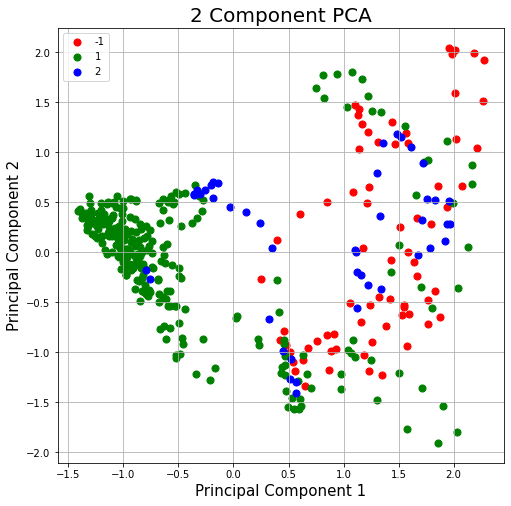

In [8]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, df[['behavior']]], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)
targets = [-1, 1, 2]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['behavior'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()



K-Means Clustering, plotted against the two principle components.

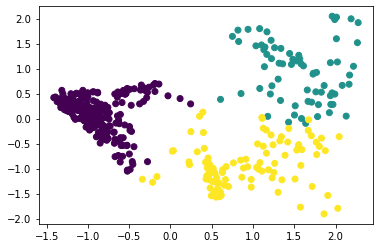

In [25]:
yk_pred = KMeans(n_clusters=3).fit_predict(X)
plt.scatter(finalDf['principal component 1'],finalDf['principal component 2'], c=yk_pred)

Testing accuracy of K-means clustering of all 68 input neurons. 

In [128]:
accuracy_score(yk_pred, Y)

0.08793969849246232

Identifying the number of Principal Components that account for 80% of the output variance, to reduce dimensionality for further analysis and classification.

In [94]:
pca80 = PCA(0.8)
Xn = pca80.fit_transform(X)

Xn_train, Xn_test, Yn_train, Yn_test = train_test_split(Xn, Y, test_size=0.30, random_state=42)


Yn_train = to_categorical(Yn_train)


Running a KMeans Clustering on this PCA

In [102]:
ykn_pred = KMeans(n_clusters=3).fit_predict(Xn)
accuracy_score(ykn_pred, Y)



0.5804020100502513

Setting up a neural network to classify the data.


---


Number of hidden layers: 28, 
Number of Epochs: 40


---

ReLu activation for inputs, softmax for hidden layer.

In [124]:
#def mymodel():
	#model = Sequential()
	#model.add(Dense(14, input_dim=7, activation='relu'))
	#model.add(Dense(3, activation='softmax'))
	#model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	#return model
 
#estimator = KerasClassifier(build_fn=mymodel, epochs=20, batch_size=5, verbose=0)
model = Sequential()
model.add(Dense(28, input_shape = (7,) , activation = 'relu'))

model.add(Dense(3, activation = 'softmax'))

model.summary()
model.compile(loss = 'categorical_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'] )

predictor = model.fit(Xn_train, Yn_train, epochs = 40, batch_size = 5)
predictor

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_59 (Dense)             (None, 28)                224       
_________________________________________________________________
dense_60 (Dense)             (None, 3)                 87        
Total params: 311
Trainable params: 311
Non-trainable params: 0
_________________________________________________________________
Epoch 1/40
278/278 [==============================] - 0s 413us/step - loss: 1.0401 - accuracy: 0.5036
Epoch 2/40
278/278 [==============================] - 0s 246us/step - loss: 0.7916 - accuracy: 0.7734
Epoch 3/40
278/278 [==============================] - 0s 232us/step - loss: 0.6138 - accuracy: 0.8129
Epoch 4/40
278/278 [==============================] - 0s 236us/step - loss: 0.4884 - accuracy: 0.8381
Epoch 5/40
278/278 [==============================] - 0s 217us/step - loss: 0.4068 - accuracy: 0.8669
Epoch 6

Plotting accuracy and loss of model w.r.t number of epochs.

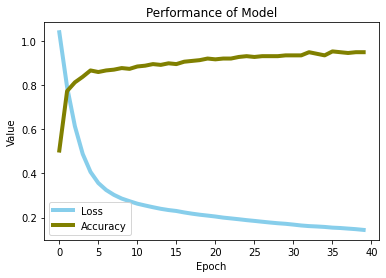

In [125]:
plt.plot(predictor.history['loss'], data=df, marker='', markerfacecolor='blue', color='skyblue', linewidth=4, label='Loss')
plt.plot(predictor.history['accuracy'], data=df, marker='', color='olive', linewidth=4, label='Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('Performance of Model')
plt.legend()
plt.show()

Testing on designated test data.

In [126]:
y_pred = model.predict_classes(Xn_test)

accuracy_score(y_pred, Yn_test)

0.7166666666666667

Neural network succesfully trained on 7 Principle Components of calcium signal output in *C. elegans*.